In [4]:
# Import libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings

pd.options.display.max_columns = 100
warnings.filterwarnings('ignore')

### Iterate through the years a find optimal number of clusters + visualization

comment_features_2008.csv [0.41905519 0.12678593]
2 clusters results in sil score of 0.610219134656607
3 clusters results in sil score of 0.5532547445299478
4 clusters results in sil score of 0.5201263317306722
5 clusters results in sil score of 0.4688508012090544
6 clusters results in sil score of 0.46665271276388975
7 clusters results in sil score of 0.45888844455917743
8 clusters results in sil score of 0.41660667325759604
9 clusters results in sil score of 0.4219035279317407


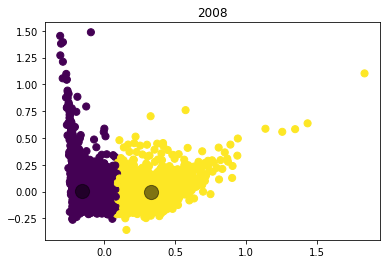

--------------------------------------------------


In [35]:
commentor_years = os.listdir('../data/cleaned/yearly_comment_features/')
commentor_years

for year in commentor_years:
    commentors = pd.read_csv(f'../data/cleaned/yearly_comment_features/{year}', index_col=0, header=0)
    shape_before = commentors.shape
    
    # Drop non-feature columns
    to_drop = ['commentor.1', 'min', 'max', 'username']
    commentors.drop(to_drop, axis=1, inplace=True)
#     print(shape_before, commentors.shape)

    # Replace NaNs
    commentors.fillna(0, inplace=True)
    
    # Scale to the range: 0 to 1
    scaler = MinMaxScaler(feature_range=[0, 1])
    commentors_rescaled = scaler.fit_transform(commentors)

    # Reduce dimensionality to 2
    pca = PCA(n_components=2)
    commentors_pca = pca.fit(commentors_rescaled)
    print(year, pca.explained_variance_ratio_)
    
    # K-means
    np.random.seed(42)
    commentors_pca = pca.fit_transform(commentors_rescaled)
    best = 0
    for i in range(2,10):
        cluster = KMeans(n_clusters=i, random_state=42)
        cluster_labels = cluster.fit_predict(commentors_pca)
        silhouettee_avg = silhouette_score(commentors_pca, cluster_labels, random_state=42)
        if silhouettee_avg > best:
            best = i
        print(f'{i} clusters results in sil score of {silhouettee_avg}')
    
    # Visualize clusters w/ centers
    cluster = KMeans(n_clusters=best, random_state=42)
    y_kmeans = cluster.fit_predict(commentors_pca)
    plt.scatter(commentors_pca[:, 0], commentors_pca[:, 1], c=y_kmeans, s=50, cmap='viridis')
    centers = cluster.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
    plt.title(year[-8:-4])
    plt.show()
    
    print('-' * 50)